In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Infomation Collection
PS_data = pd.read_csv('/content/PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv')
PS_data.head()
PS_data.info()
PS_data.describe()
PS_data.isna().mean()*100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           4963 non-null   object 
 1   Console        4963 non-null   object 
 2   Name           4963 non-null   object 
 3   Publisher      4963 non-null   object 
 4   Developer      4963 non-null   object 
 5   Total Shipped  4963 non-null   float64
 6   Total Sales    4963 non-null   float64
 7   NA Sales       4963 non-null   float64
 8   PAL Sales      4963 non-null   float64
 9   Japan Sales    4963 non-null   float64
 10  Other Sales    4963 non-null   float64
 11  Release Date   3526 non-null   object 
 12  Last Update    2801 non-null   object 
 13  rating         2847 non-null   float64
 14  ratings_count  2847 non-null   float64
 15  metacritic     1530 non-null   float64
 16  genres         2803 non-null   object 
 17  platforms      2847 non-null   object 
dtypes: float

,0
Game,0.000000
Console,0.000000
Name,0.000000
Publisher,0.000000
Developer,0.000000
Total Shipped,0.000000
Total Sales,0.000000
NA Sales,0.000000
PAL Sales,0.000000
Japan Sales,0.000000


The variables 'Metacritic' and 'Last Update' were removed as Metacritic was missing 69% of values and 'Last Update' was missing 43% of values.

In [2]:
#Data Cleaning
PS_clean = PS_data.drop(columns= ["metacritic", "Last Update"])
PS_clean.isna().sum()

,0
Game,0
Console,0
Name,0
Publisher,0
Developer,0
Total Shipped,0
Total Sales,0
NA Sales,0
PAL Sales,0
Japan Sales,0


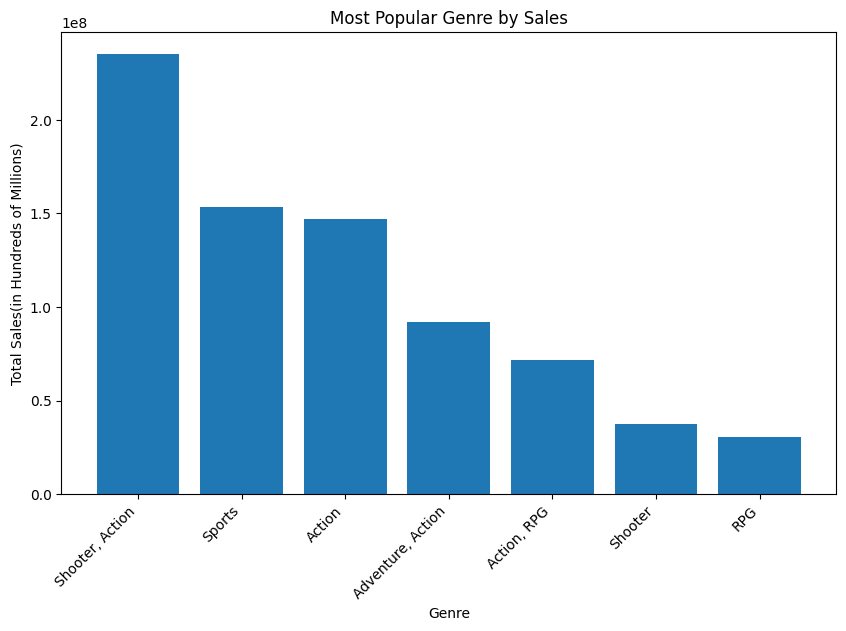

In [3]:
#Visualisation 1
#Most Popular Genre by Sales
genre = PS_Clean.dropna(subset= ['genres', 'Total Sales'])

each_genre =(
    genre
    .groupby("genres")["Total Sales"]
    .sum()
    .sort_values(ascending=False)
)

top7 = each_genre.head(7)

plt.figure(figsize=(10, 6))
plt.bar(top7.index, top7.values)
plt.title("Most Popular Genre by Sales")
plt.xlabel("Genre")
plt.ylabel("Total Sales(in Hundreds of Millions)")
plt.xticks(rotation=45, ha="right")
plt.show()




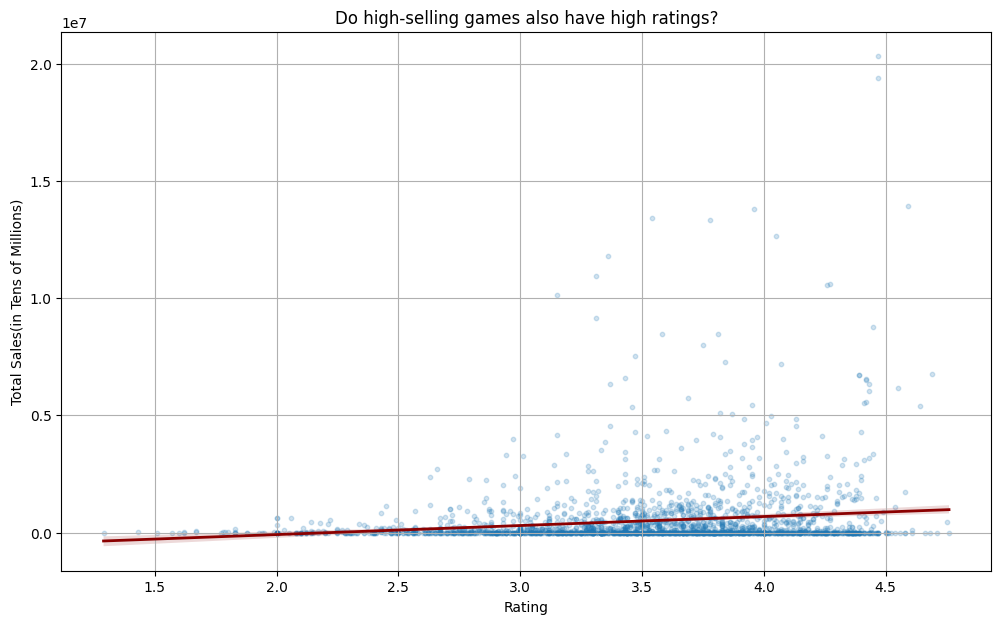

In [4]:
#Visualisation 2
#Do high-selling games also have high ratings?
import seaborn as sns
visual2 = PS_Clean[PS_Clean['rating']>0].copy()
plt.figure(figsize=(12, 7))
sns.regplot(x='rating', y='Total Sales', data=visual2,
            scatter_kws={'alpha':0.2, 's':10},
            line_kws={'color':'darkred', 'lw':2})
plt.title('Do high-selling games also have high ratings?')
plt.xlabel('Rating')
plt.ylabel('Total Sales(in Tens of Millions)')
plt.grid(True)
plt.show()





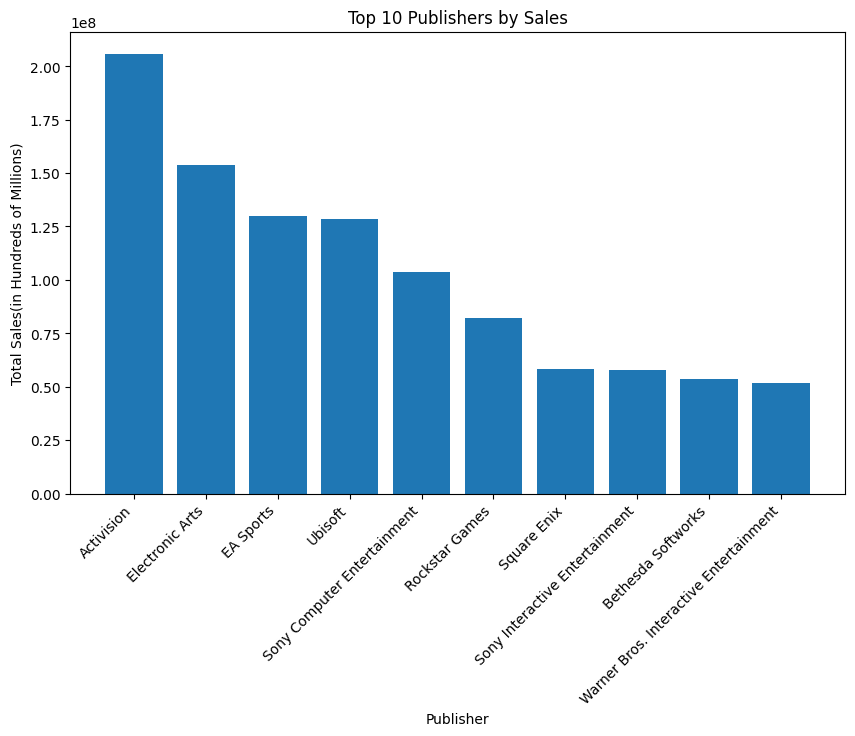

In [8]:
#Visulisation 3
#Which publishers sell the most on PlayStation?
group_publisher =(PS_Clean.groupby("Publisher")["Total Sales"].sum().sort_values(ascending=False))
top10 = group_publisher.head(10)
top10

plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values)
plt.title("Top 10 Publishers by Sales")
plt.xlabel("Publisher")
plt.ylabel("Total Sales(in Hundreds of Millions)")
plt.xticks(rotation=45, ha="right")
plt.show()

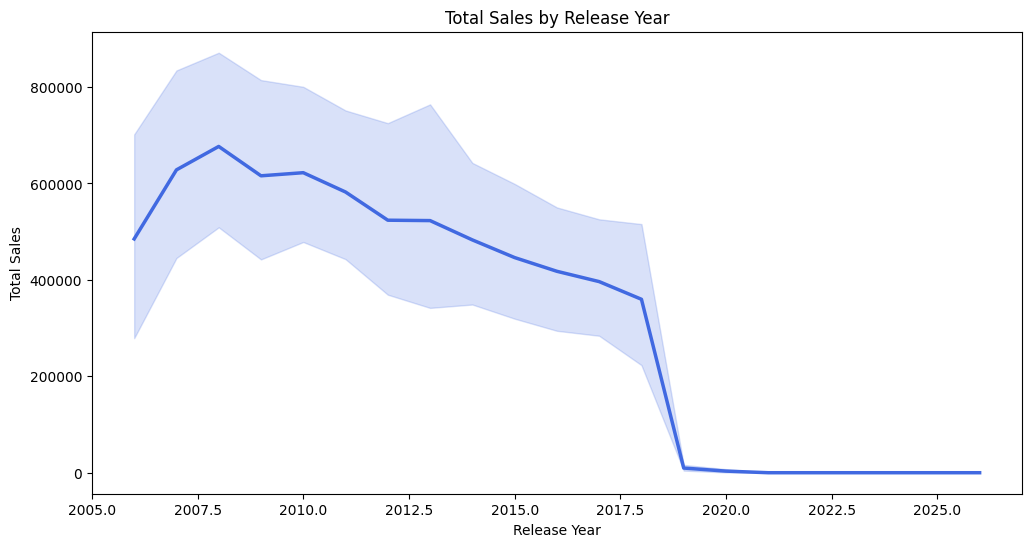

In [17]:
#Feature Engineering
PS_Clean['Release Date']= pd.to_datetime(PS_Clean['Release Date'])
PS_Clean['Release Year'] = PS_Clean['Release Date'].dt.year
PS_Clean=PS_Clean.dropna(subset=['Release Year'])
PS_Clean['Release Year']

#Visualisation 4
#Total Sales by Release Year
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(12,6))
fig4 = sns.lineplot(x='Release Year', y='Total Sales', data=PS_Clean, color='royalblue', linewidth=2.5)
plt.title('Total Sales by Release Year')
fig4.xaxis.set_major_locator(MaxNLocator(integer=True))  #the years were appearing as floats so this fuction was imported so that the years apear as intergers
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.show()



